<a href="https://colab.research.google.com/github/pranav-deo-op/group-deliverable-msds530/blob/main/group_analysis_nyc_taxi_fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# Set the Kaggle username and token as environment variables
os.environ['KAGGLE_USERNAME'] = 'pranavd2808'
os.environ['KAGGLE_KEY'] = '032077c9f35763f2fdee79fd3e014f3f'

In [2]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction


100% 1.56G/1.56G [01:13<00:00, 24.0MB/s]
100% 1.56G/1.56G [01:13<00:00, 22.7MB/s]


In [3]:
import pandas as pd
import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = '/content/new-york-city-taxi-fare-prediction.zip'

# Extract the desired CSV file from the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_data')  # Extract the files to a directory

# Read the extracted CSV file into a DataFrame
csv_file_path = '/content/extracted_data/train.csv'
nyc_taxi = pd.read_csv(csv_file_path)

In [4]:
# Display the first few rows of the DataFrame
nyc_taxi.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the summary statistics of the numerical columns
nyc_taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [6]:
# Check the data types of the columns
nyc_taxi.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

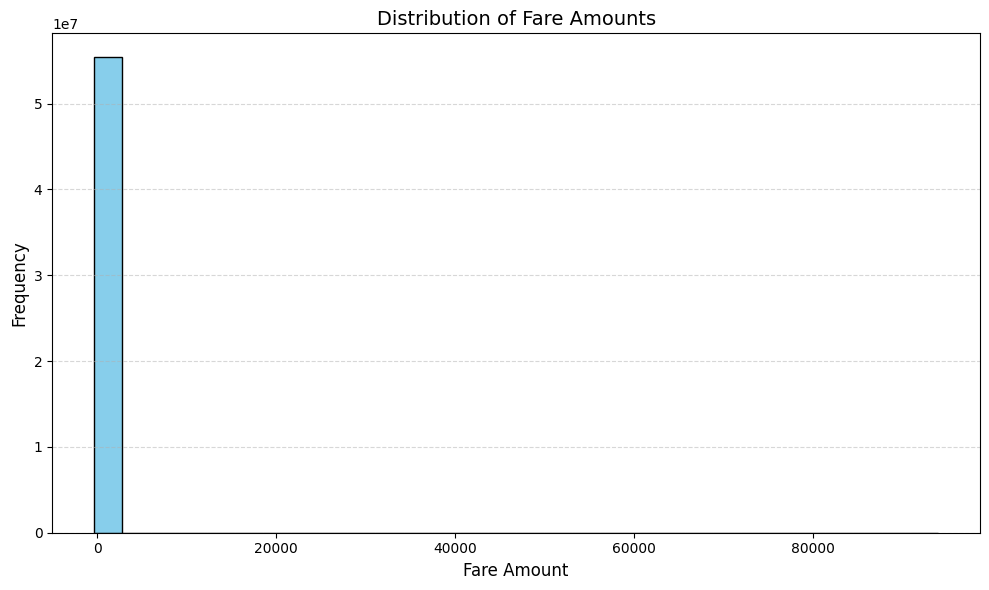

In [8]:
# Plot a histogram of fare amounts
plt.figure(figsize=(10, 6))
plt.hist(nyc_taxi['fare_amount'], bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Fare Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Fare Amounts', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

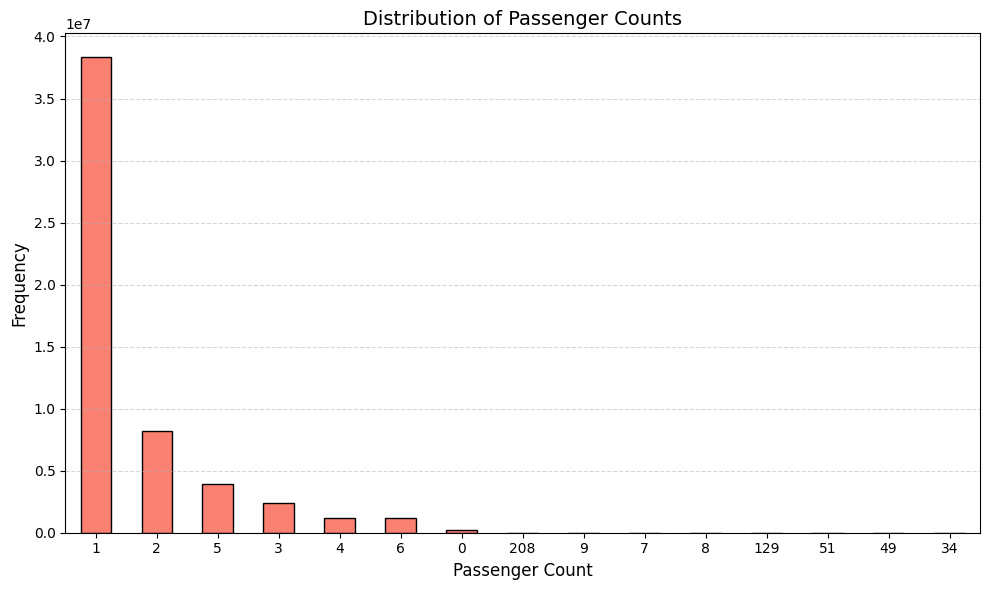

In [9]:
# Count the occurrences of each passenger count
passenger_counts = nyc_taxi['passenger_count'].value_counts()

# Plot a bar plot of passenger counts
plt.figure(figsize=(10, 6))
passenger_counts.plot(kind='bar', edgecolor='black', color='salmon')
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Passenger Counts', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

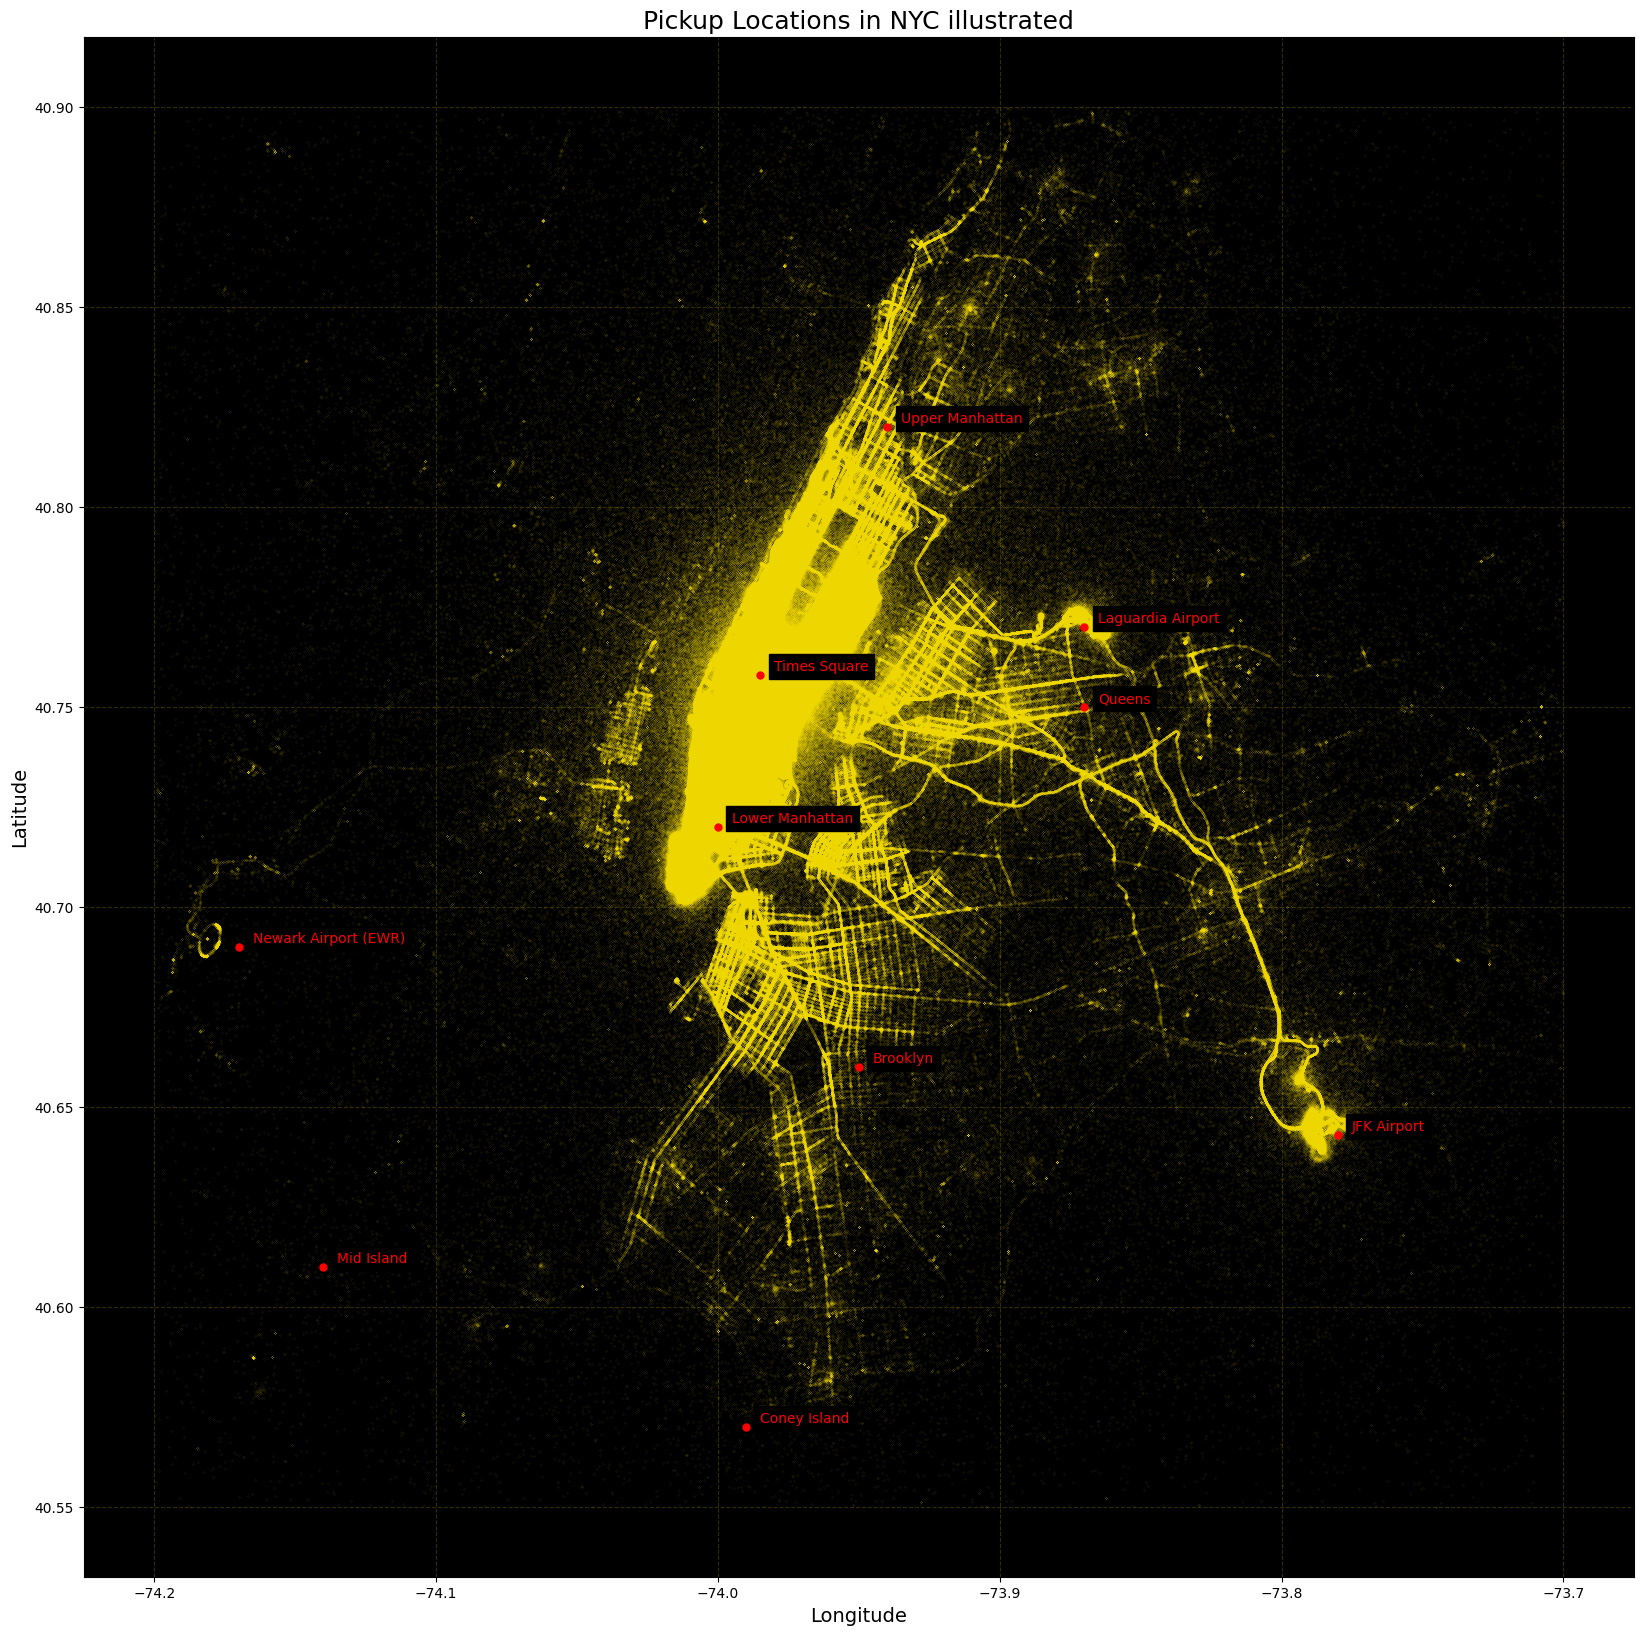

In [20]:
# Set color scheme
taxi_yellow = '#FBE300'  # Yellow color for taxi
taxi_black = '#000000'   # Black color for background

# We will see the following scatterplot showing the pickup locations:
plt.figure(figsize=(20, 20))
plt.plot(list(nyc_taxi.pickup_longitude), list(nyc_taxi.pickup_latitude), '.', markersize=0.1, color=taxi_yellow)

for landmark in landmarks:
    plt.plot(landmarks[landmark][0], landmarks[landmark][1], '.', markersize=10, alpha=1, color='r')
    plt.annotate(landmark, (landmarks[landmark][0] + 0.005, landmarks[landmark][1] + 0.001), color='r', backgroundcolor=taxi_black)

plt.title("Pickup Locations in NYC illustrated", color=taxi_black, fontsize=18)
plt.xlabel("Longitude", color=taxi_black, fontsize=14)
plt.ylabel("Latitude", color=taxi_black, fontsize=14)
plt.xticks(color=taxi_black)
plt.yticks(color=taxi_black)
plt.gca().set_facecolor(taxi_black)
plt.grid(color=taxi_yellow, linestyle='--', alpha=0.2)
plt.show()


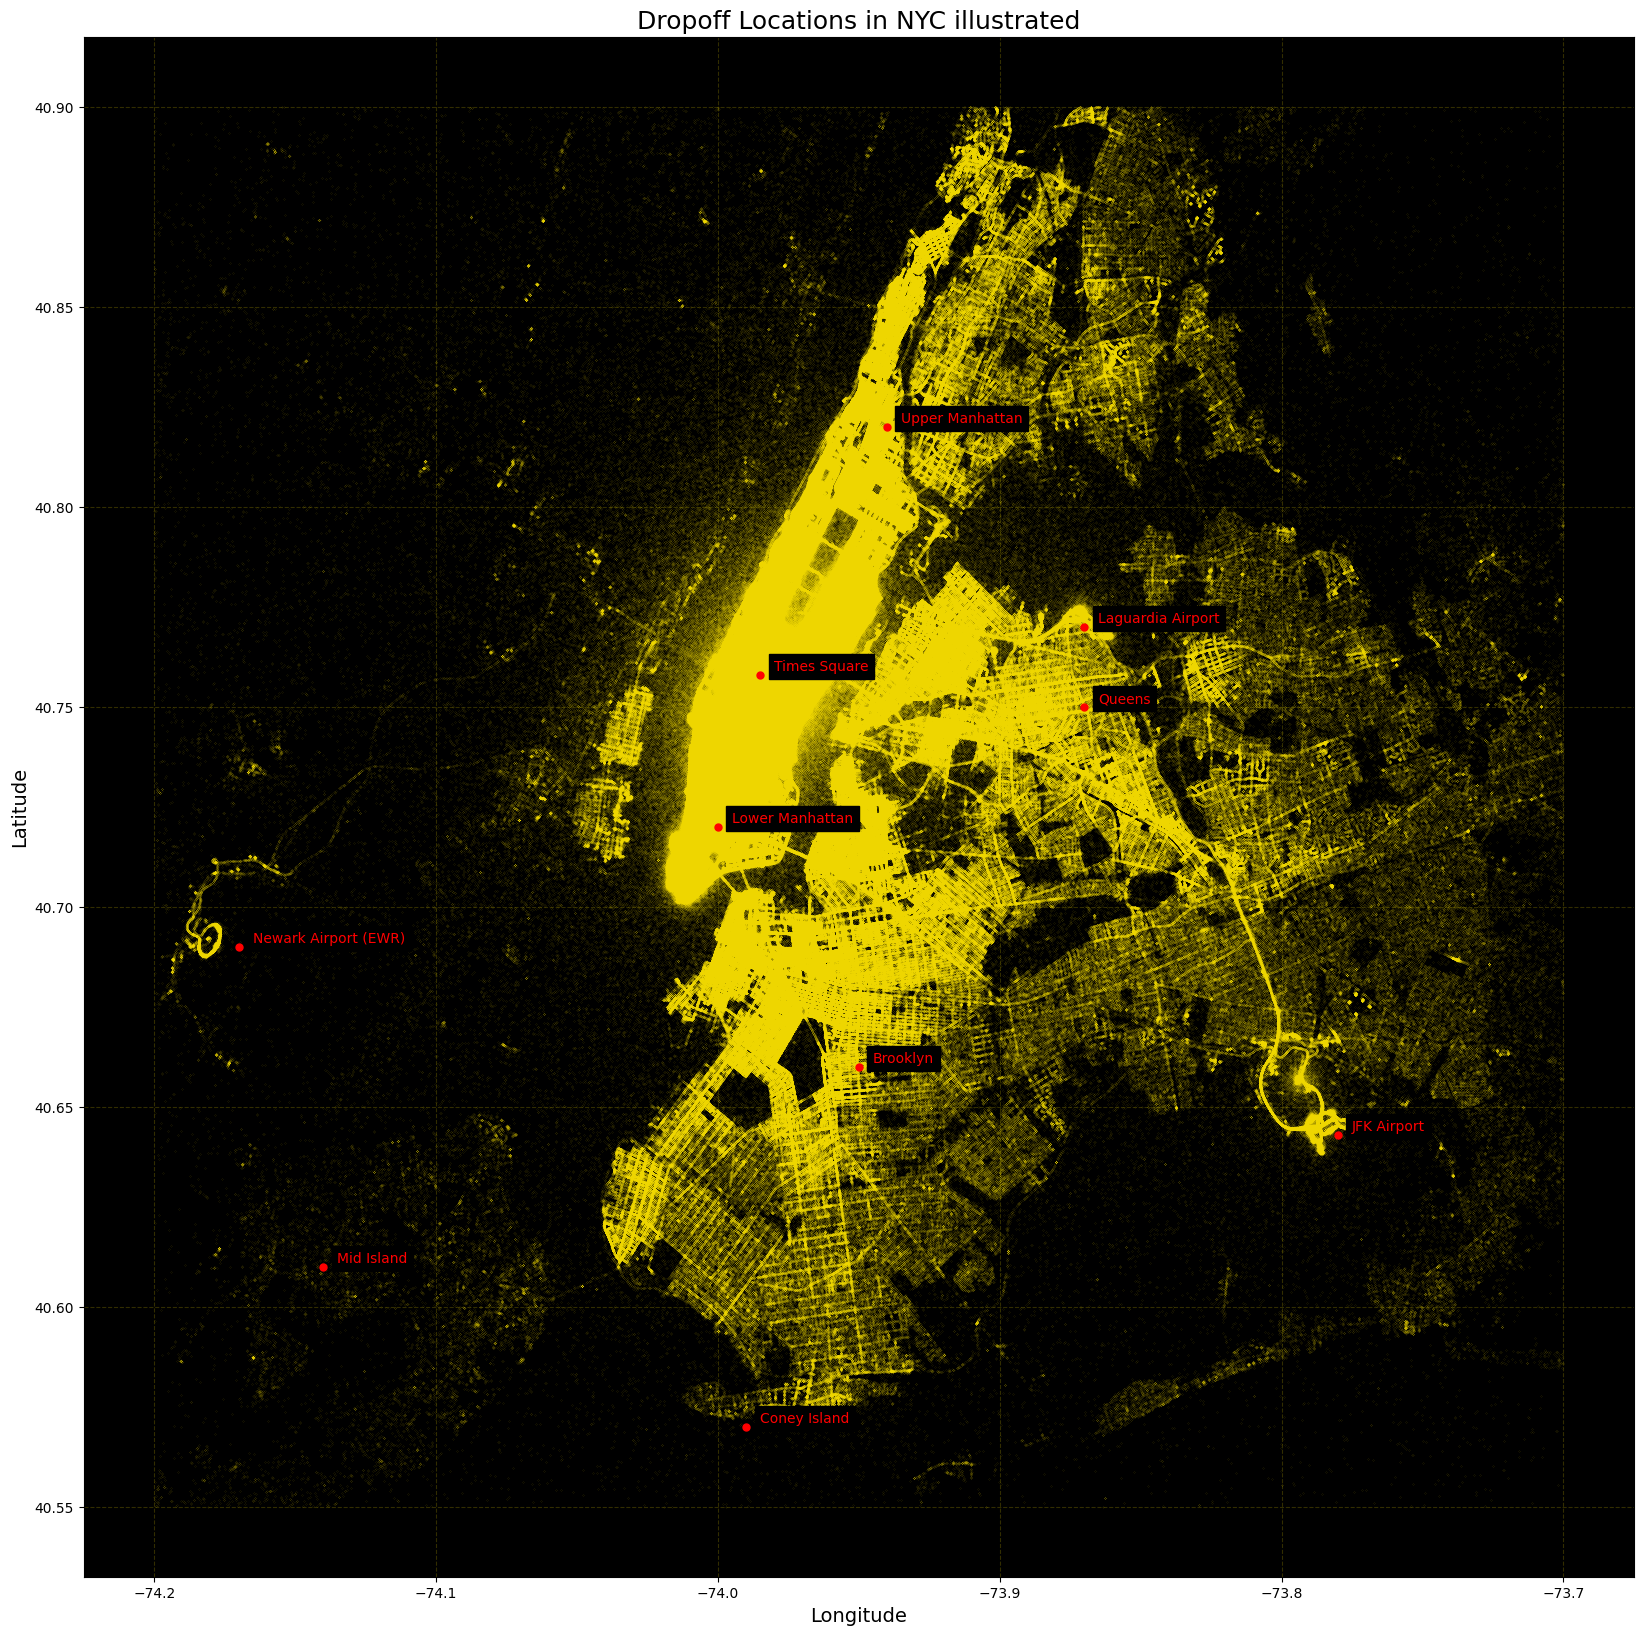

In [22]:
# Set color scheme
taxi_yellow = '#FBE300'  # Yellow color for taxi
taxi_black = '#000000'   # Black color for background

# Now we will see the following scatterplot showing the dropoff locations:
plt.figure(figsize=(20, 20))
plt.plot(list(nyc_taxi.dropoff_longitude), list(nyc_taxi.dropoff_latitude), '.', markersize=0.1, color=taxi_yellow)

for landmark in landmarks:
    plt.plot(landmarks[landmark][0], landmarks[landmark][1], '.', markersize=10, alpha=1, color='r')
    plt.annotate(landmark, (landmarks[landmark][0] + 0.005, landmarks[landmark][1] + 0.001), color='r', backgroundcolor=taxi_black)

plt.title("Dropoff Locations in NYC illustrated", color=taxi_black, fontsize=18)
plt.xlabel("Longitude", color=taxi_black, fontsize=14)
plt.ylabel("Latitude", color=taxi_black, fontsize=14)
plt.xticks(color=taxi_black)
plt.yticks(color=taxi_black)
plt.gca().set_facecolor(taxi_black)
plt.grid(color=taxi_yellow, linestyle='--', alpha=0.2)
plt.show()


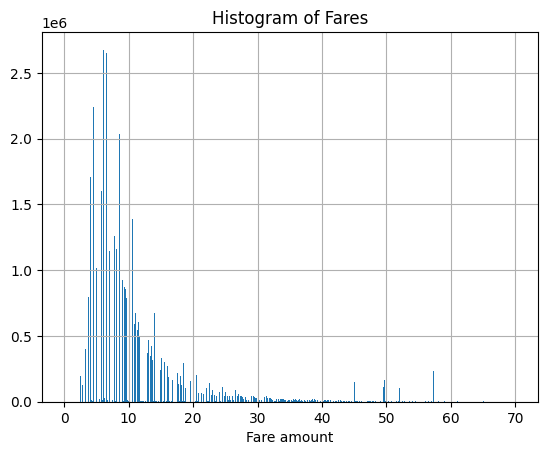

In [23]:
nyc_taxi = nyc_taxi[(nyc_taxi['fare_amount'] >=0) & (nyc_taxi['fare_amount'] <= 70)]

nyc_taxi['fare_amount'].hist(bins=700)
plt.xlabel("Fare amount")
plt.title("Histogram of Fares")
plt.show()